In [11]:
import numpy as np
import pandas as pd
import sys 
path = '..'
sys.path.append(path)
from logger import Logger
import matplotlib.pyplot as plt
import gui as GUI

In [2]:
log = Logger()
log.enable_logger()
filename = 'Logger_Quadcopter_AchieveGoal_20200314152629.csv'
log.file_read(filename)

True

In [12]:
def cost_computing(task, state):
    if task == 1:
        Weight_Matrix_t = np.diag([50,50,80,10,10,10,5,5,5,1,1,1])
        GOAL = np.array([1.5,1.5,4.0, 0,0,0,0,0,0,0,0,0])
        cost = (0.5 * (state - GOAL).dot(Weight_Matrix_t).dot(state - GOAL))
    return cost

In [13]:
def string2list_Quad(temp):
    temp_result = []
    for i in range(len(temp)):
        # Quadcopter
        temp_value = temp[i].replace('\r\n','').replace('[', '').replace(']', '').split(' ')
        temp_value = [float(x) for x in temp_value if x != '']
        #print(temp_value)
        temp_result.append(temp_value)
        #print(temp_result)
    return np.array(temp_result)

In [14]:
def result_process(log, len_seq, flag_combine):
    len_seq_all = []
    state_sequence_all = []#np.array([])
    cost_sequence_all = []#np.array([])
    for j in log.df.Epoch.unique():
        state_seq = log.df[(log.df['Phase'] == 'Update') & (log.df['Parameter'] == 'State_Init') & (log.df['Epoch'] == j)].reset_index(drop=True)['Value']
        if flag_combine:
            sequence = string2list_Quad(state_seq)[:len_seq]
        else:
            sequence = string2list_Quad(state_seq)#[:len_seq]
        cost_sequence = np.array([])
        for i in range(len(sequence)):
            state = sequence[i]
            cost = cost_computing(1, state)
            cost_sequence = np.append(cost_sequence, cost)
        len_seq_all.append(len(state_seq))
        cost_sequence_all.append(np.array(cost_sequence))
        state_sequence_all.append(np.array(sequence))
    print(len_seq_all)
    return np.array(state_sequence_all), np.array(cost_sequence_all)

In [22]:
if False:
    labels = ['Reference', 'no CV', 'CV', 'CV', 'CV']
    filename = ['Logger_Quadcopter_AchieveGoal_20200314173536',
                'Logger_Quadcopter_AchieveGoal_20200314231732',
                'Logger_Quadcopter_AchieveGoal_20200315142130',
               'Logger_Quadcopter_AchieveGoal_20200315151046',
               'Logger_Quadcopter_AchieveGoal_20200315161218']
elif True:
    # Compare Wind in AchieveGoal
    labels = ['Model with Wind', 'Model without Wind']
    #filename = ['Logger_Quadcopter_AchieveGoal_20200315134146',
    #           'Logger_Quadcopter_AchieveGoal_20200314211959']
    filename = ['Logger_Quadcopter_AchieveGoal_20200315055346',
               'Logger_Quadcopter_AchieveGoal_20200314173536']
elif False:
    # Compare the Noise in Angle
    labels = ['0.1', '1', '5']#, '0.5'
    filename = ['Logger_Quadcopter_AchieveGoal_20200314211959',
                #'Logger_Quadcopter_AchieveGoal_20200314173536',
               'Logger_Quadcopter_AchieveGoal_20200314213558',
               'Logger_Quadcopter_AchieveGoal_20200314231732']
elif False:
    # Compare the Noise in Thrust
    labels = ['0.5', '1', '2', '4', '10', '40', '80', '160']
    filename = ['Logger_Quadcopter_AchieveGoal_20200315193628',
               'Logger_Quadcopter_AchieveGoal_20200315220439',
               'Logger_Quadcopter_AchieveGoal_20200316072146',
               'Logger_Quadcopter_AchieveGoal_20200316072236',
               'Logger_Quadcopter_AchieveGoal_20200314173536',
                'Logger_Quadcopter_AchieveGoal_20200314152629',
               'Logger_Quadcopter_AchieveGoal_20200314182125',
               'Logger_Quadcopter_AchieveGoal_20200314200804']

In [23]:
log = [ Logger() for _ in range(len(filename))]
for i in range(len(filename)):
    log[i].enable_logger()
    log[i].file_read(filename[i] + '.csv')

151
2
0
[150, 149, 149, 149, 149]
1
[100, 99, 99, 99, 99, 99]


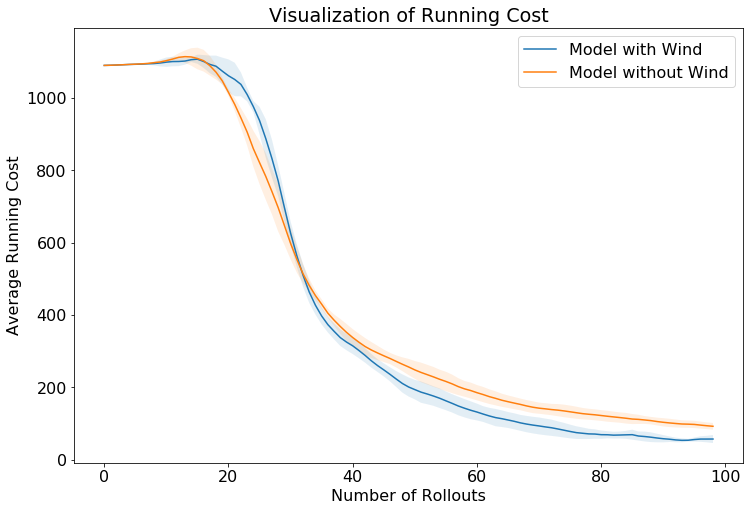

In [24]:
plt.figure(figsize = (12,8))
font_size = 16
len_seq = 99
cost = []
doc = pd.read_csv('list.csv')
for i in range(len(doc)):
    cost = np.append(cost, cost_computing(1, np.array(doc.values.tolist())[i]))
print(len(cost))
print(len(filename))
for i in range(len(filename)):
    print(i)
    #if i == 0:
    #    len_seq = 149
    #else:
    #    len_seq = 99
    state_sequence_all, cost_sequence_all = result_process(log[i], len_seq, True)
    temp_mean = np.mean(cost_sequence_all, axis=0)
    temp_error = np.std(cost_sequence_all, axis=0)
    #plt.errorbar(range(min_len), temp_mean , yerr=temp_error, errorevery=3, label = i)
    plt.plot(range(len_seq), temp_mean, label = labels[i])
    plt.fill_between(range(len_seq), (temp_mean - temp_error), (temp_mean + temp_error), alpha=0.12)
#plt.plot(range(len(cost)), cost, 'k', label = 'LQR')
#plt.plot(range(99), cost[:99], 'k', label = 'LQR')
plt.legend(loc = 'upper right')
plt.xlabel('Number of Rollouts', size = font_size)
plt.ylabel('Average Running Cost', size = font_size)
plt.title('Visualization of Running Cost', size = font_size*1.2)
plt.rcParams.update({'font.size': font_size})
if False:
    savefilename = 'AchieveGoal_CompareWindModel'
    plt.savefig('{}.png'.format(savefilename), format='png')
    plt.savefig('{}.eps'.format(savefilename), format='eps')
plt.show()

['Logger_Quadcopter_AchieveGoal_20200315055346', 'Logger_Quadcopter_AchieveGoal_20200314173536']
0
[150, 149, 149, 149, 149]
1
[100, 99, 99, 99, 99, 99]


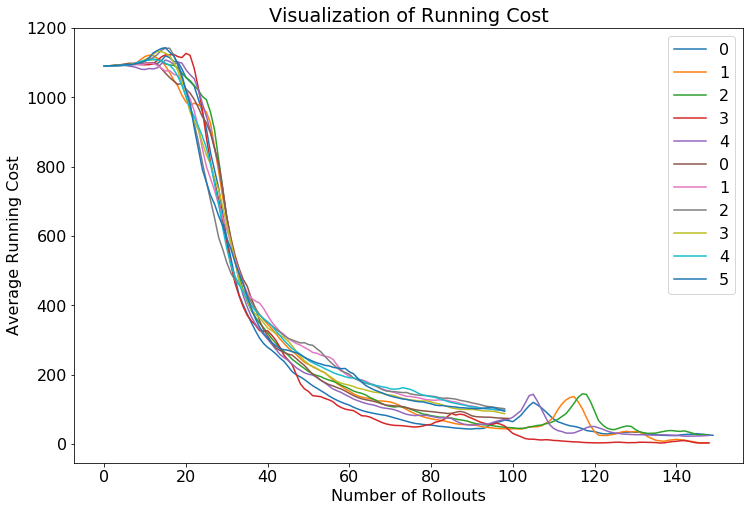

In [25]:
plt.figure(figsize = (12,8))
font_size = 16
len_seq = 99
print(filename)
for i in range(len(filename)):
    print(i)
    state_sequence_all, cost_sequence_all = result_process(log[i], len_seq, False)
    if True:
        for j in range(len(cost_sequence_all)):
            plt.plot(range(len(cost_sequence_all[j])), cost_sequence_all[j], label = j)
    else:
        temp_mean = np.mean(cost_sequence_all, axis=0)
        temp_error = np.std(cost_sequence_all, axis=0)
        #plt.errorbar(range(min_len), temp_mean , yerr=temp_error, errorevery=3, label = i)
        plt.plot(range(len_seq), temp_mean, label = labels[i])
        plt.fill_between(range(len_seq), (temp_mean - temp_error), (temp_mean + temp_error), alpha=0.12)
plt.legend()
plt.xlabel('Number of Rollouts', size = font_size)
plt.ylabel('Average Running Cost', size = font_size)
plt.title('Visualization of Running Cost', size = font_size*1.2)
plt.rcParams.update({'font.size': font_size})
plt.show()

In [27]:
plt.figure(figsize = (20,12))
len_seq = 149
titles = []
ylabels = ['x', 'y', 'z', 'dx', 'dy', 'dz', 'phi', 'theta', 'psi', 'dphi', 'dtheta', 'dpsi']
for i in range(len(filename)):
    state_sequence_all, cost_sequence_all = result_process(log[i], len_seq, True)
    for j in range(12):
        plt.subplot(4,3,j+1)
        if True:
            for k in range(len(state_sequence_all)):
                plt.plot(range(len(state_sequence_all[k][:,j])), state_sequence_all[k][:,j], label = k)
        else:
            state_mean = np.mean(np.array(state_sequence_all), axis=0)
            state_error = np.std(np.array(state_sequence_all), axis=0)
            if j > 5:
                plt.plot(range(len_seq), np.rad2deg(state_mean[:,j]), label = i)
                plt.fill_between(range(len_seq), np.rad2deg(state_mean[:,j] - state_error[:,j]), np.rad2deg(state_mean[:,j] + state_error[:,j]), alpha=0.12)
            else:
                plt.plot(range(len_seq), state_mean[:,j], label = i)
                plt.fill_between(range(len_seq), (state_mean[:,j] - state_error[:,j]), (state_mean[:,j] + state_error[:,j]), alpha=0.12)
    plt.xlabel('Time [s]')
    plt.ylabel(ylabels[j])
    #plt.legend(loc = 'upper left')
plt.show()

[150, 149, 149, 149, 149]
[100, 99, 99, 99, 99, 99]
